In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline
from fastai import *
from fastai.vision import *
from fastai.vision.gan import *

### LSun bedroom data

In [2]:
path = untar_data(URLs.LSUN_BEDROOMS)

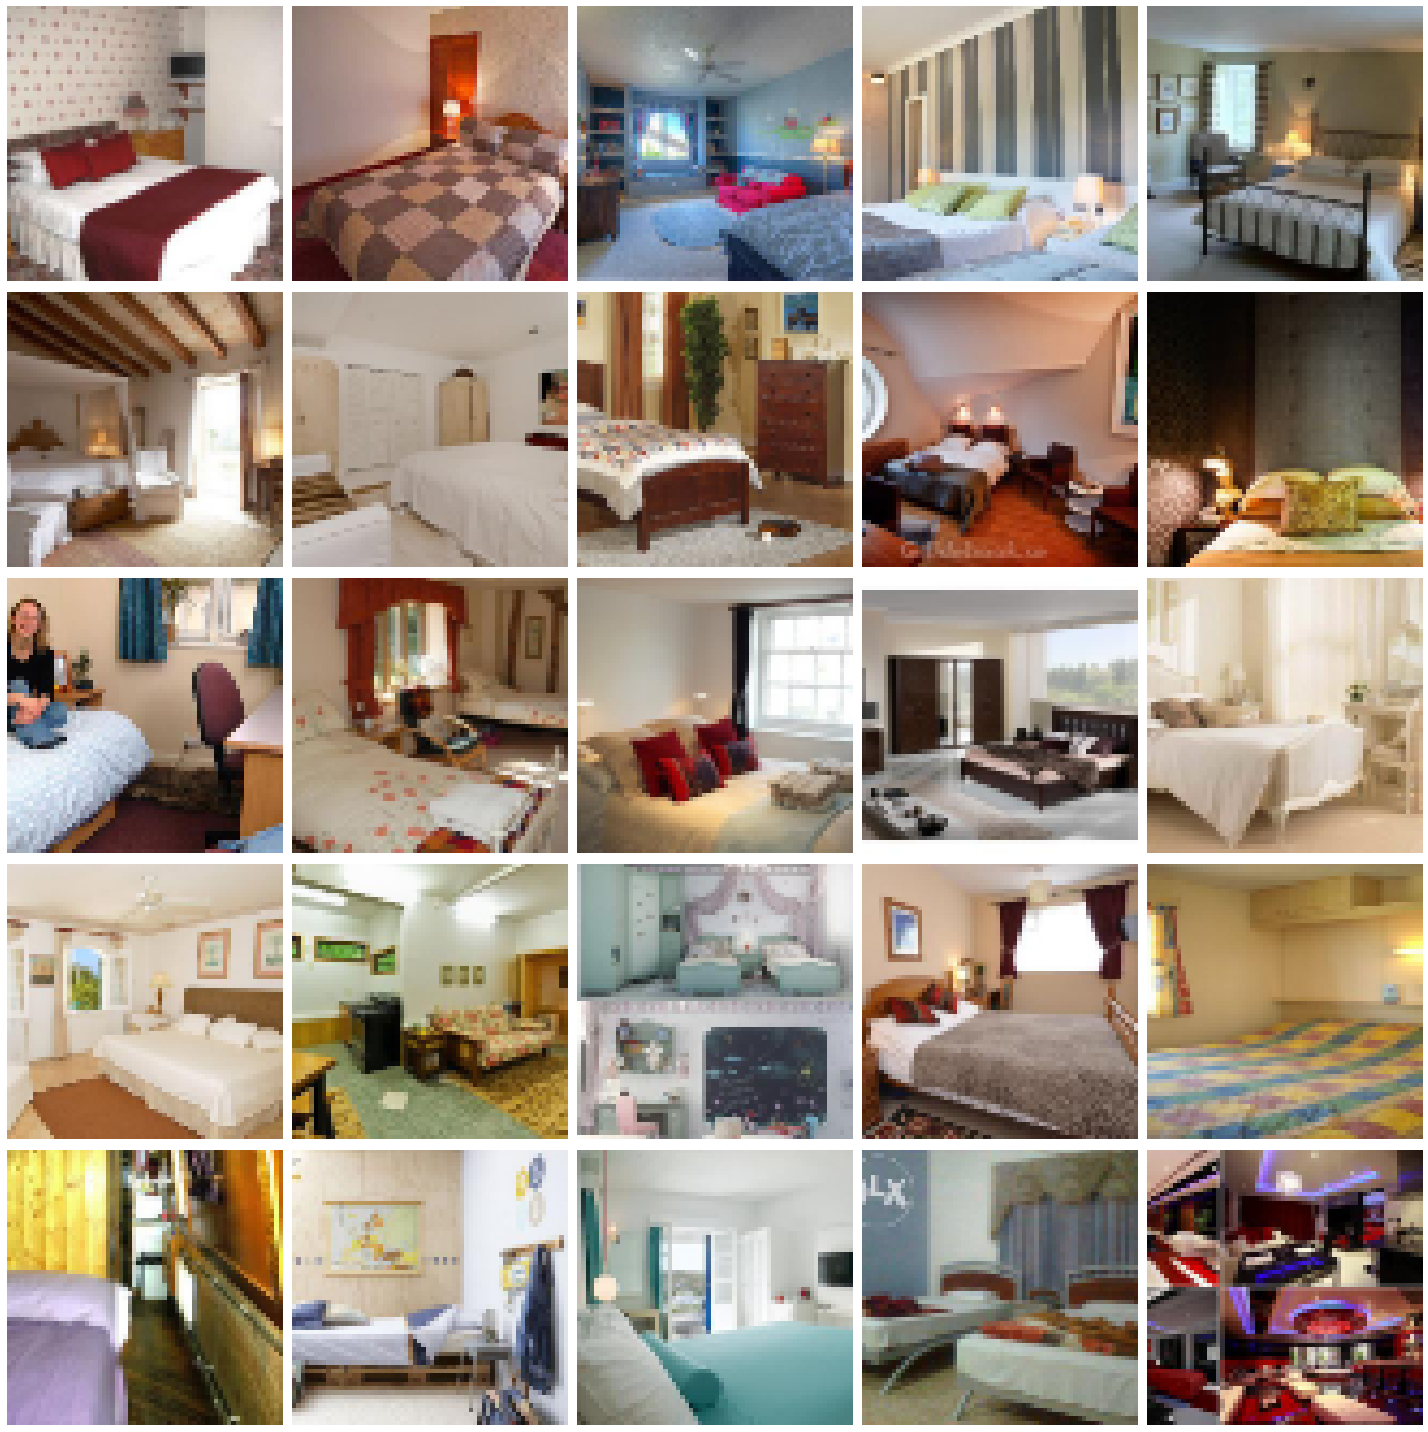

In [3]:
def get_data(bs, size):
    return (GANItemList.from_folder(path, noise_sz=100)
           .split_none()
           .label_from_func(noop)
           .transform(tfms=[[crop_pad(size=size, row_pct=(0,1), col_pct=(0,1))], []], size=size, tfm_y=True)
           .databunch(bs=bs)
           .normalize(stats=[torch.tensor([0.5,0.5,0.5]), torch.tensor([0.5,0.5,0.5])], do_x=False, do_y=True))

data = get_data(128, 64)
data.show_batch(rows=5)

### Models

epoch,train_loss,valid_loss,gen_loss,disc_loss,time
0,-0.568396,#na#,0.607667,-0.788593,40:26
1,-0.705581,#na#,0.515380,-0.957765,08:26
2,-0.705076,#na#,0.519473,-0.965460,08:27
3,-0.664296,#na#,0.510318,-0.891042,08:26
4,-0.611046,#na#,0.452803,-0.837988,08:25
5,-0.562753,#na#,0.424105,-0.772520,08:25
6,-0.565065,#na#,0.410199,-0.751773,08:25
7,-0.554267,#na#,0.408121,-0.745752,08:26
8,-0.521612,#na#,0.410502,-0.722529,08:25
9,-0.516587,#na#,0.381800,-0.687118,08:26


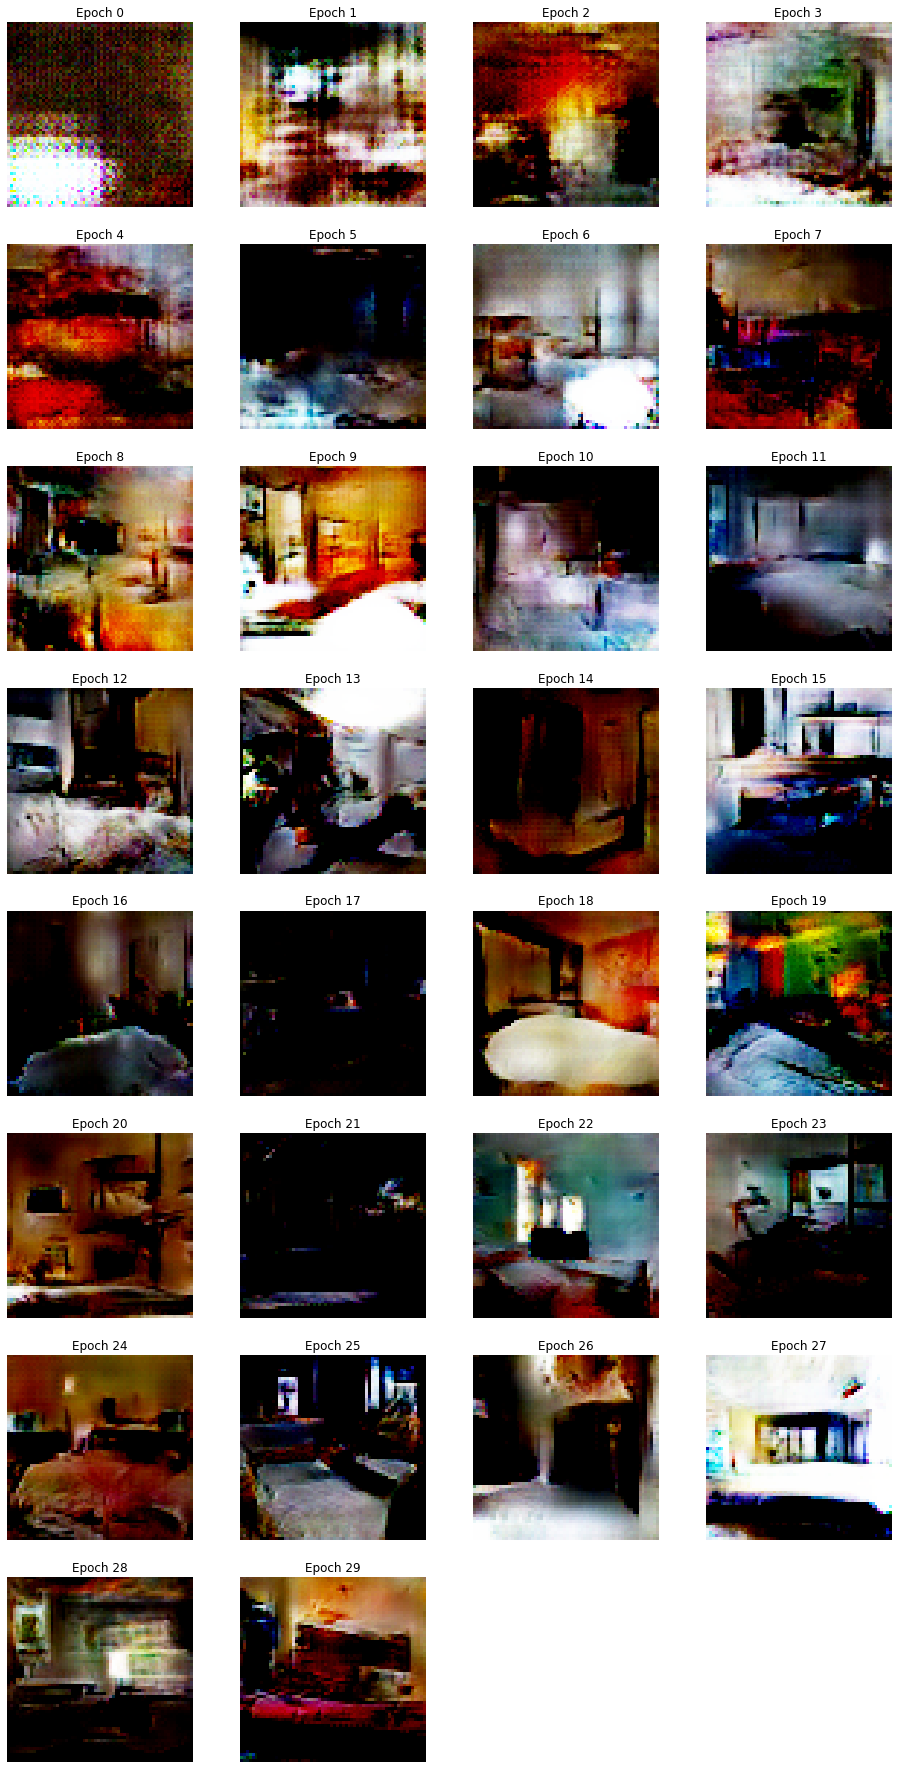

In [4]:
generator = basic_generator(in_size=64, n_channels=3, n_extra_layers=1)
critic = basic_critic(in_size=64, n_channels=3, n_extra_layers=1)
learn = GANLearner.wgan(data, generator, critic, switch_eval=False, opt_func=partial(optim.Adam, betas=(0., 0.99)), wd=0.)
learn.fit(30, 2e-4)

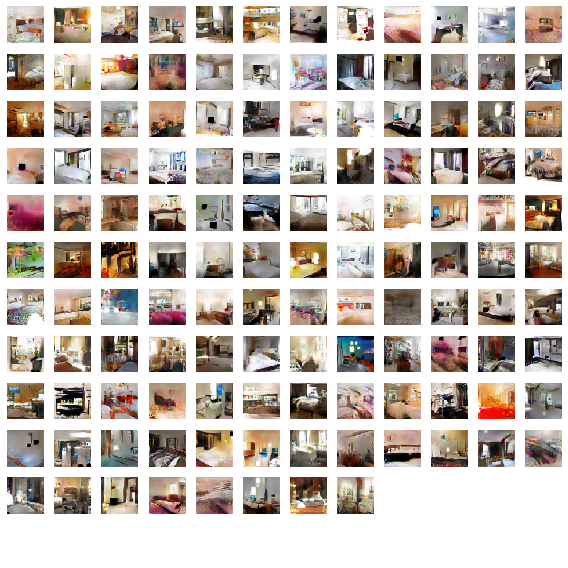

In [5]:
learn.gan_trainer.switch(gen_mode=True)
learn.show_results(ds_type=DatasetType.Train, rows=16, figsize=(8,8))